# Degree Day Analysis


In [13]:
from pathlib import Path
import datetime as dt
import numpy as np
import pandas as pd
import hvplot.pandas
import sqlalchemy
import helpful_functions as hf
%matplotlib inline

## Import Data from Database

In [14]:
engine = sqlalchemy.create_engine(hf.db_connection_string)
print(engine)
inspector = sqlalchemy.inspect(engine)
inspector.get_table_names()

Engine(sqlite:///Resources/energy_data.db)


['DegreeDays_2020',
 'DegreeDays_2021',
 'DegreeDays_Austin_2020',
 'DegreeDays_Austin_2021',
 'DegreeDays_Corpus_Christi_2020',
 'DegreeDays_Corpus_Christi_2021',
 'DegreeDays_Dallas_2020',
 'DegreeDays_Dallas_2021',
 'DegreeDays_Houston_2020',
 'DegreeDays_Houston_2021',
 'DegreeDays_San_Angelo_2020',
 'DegreeDays_San_Angelo_2021',
 'DegreeDays_San_Antonio_2020',
 'DegreeDays_San_Antonio_2021',
 'ERCOT_2020',
 'ERCOT_2021',
 'ERCOT_Austin_2020',
 'ERCOT_Austin_2021',
 'ERCOT_Corpus_Christi_2020',
 'ERCOT_Corpus_Christi_2021',
 'ERCOT_Dallas_2020',
 'ERCOT_Dallas_2021',
 'ERCOT_Houston_2020',
 'ERCOT_Houston_2021',
 'ERCOT_San_Angelo_2020',
 'ERCOT_San_Angelo_2021',
 'ERCOT_San_Antonio_2020',
 'ERCOT_San_Antonio_2021',
 'WU_Austin_2020',
 'WU_Austin_2021',
 'WU_Corpus_Christi_2020',
 'WU_Corpus_Christi_2021',
 'WU_Dallas_2020',
 'WU_Dallas_2021',
 'WU_Houston_2020',
 'WU_Houston_2021',
 'WU_San_Angelo_2020',
 'WU_San_Angelo_2021',
 'WU_San_Antonio_2020',
 'WU_San_Antonio_2021']

In [15]:
def gen_dd_df(
    city, 
    year, 
    data_source='DegreeDays',
    new_col_name=None,
    old_col_name='HDD 65', 
    engine=engine
):
    df = pd.read_sql_table(
        '_'.join([data_source, city, year]),
        con=engine
    )
    if new_col_name is not None:
        df.rename(columns={old_col_name: new_col_name}, inplace=True)
    return df



In [16]:
dti_dict = {
    '2020' : pd.DataFrame(pd.date_range("2020-02-01", periods=24*28*4, freq="15T", name='Date')),
    '2021' : pd.DataFrame(pd.date_range("2021-02-01", periods=24*28*4, freq="15T", name='Date'))
}

dd_df_dict = {}
for city in hf.city_list_2:
    dd_df_dict[city] = {}
    for year in hf.year_list:
        print('\n', 80*'_', city, year, )
        dd_df_dict[city][year] = gen_dd_df(city, year)
        dd_df_dict[city][year] = pd.concat([dd_df_dict[city][year], dti_dict[year]],join='outer',)
        dd_df_dict[city][year].sort_values('Date', inplace=True)
        dd_df_dict[city][year] = dd_df_dict[city][year].reindex(columns=['City', 'Year', 'Date', 'Overlay_Date', 'HDD 65']).reset_index(drop=True)
        dd_df_dict[city][year]['HDD 65'] = dd_df_dict[city][year]['HDD 65'].interpolate(method='pad')
        dd_df_dict[city][year]['City'] = city
        dd_df_dict[city][year]['Year'] = year
        dd_df_dict[city][year]['Overlay_Date'] = dd_df_dict[city][year]['Date'].apply(lambda x: x.replace(year=1900))
        dd_df_dict[city][year]['Date'] = dd_df_dict[city][year]['Date'].apply(lambda x: x.to_pydatetime())
        print(dd_df_dict[city][year].head())


 ________________________________________________________________________________ Austin 2020
     City  Year                Date        Overlay_Date  HDD 65
0  Austin  2020 2020-02-01 00:00:00 1900-02-01 00:00:00    15.2
1  Austin  2020 2020-02-01 00:00:00 1900-02-01 00:00:00    15.2
2  Austin  2020 2020-02-01 00:15:00 1900-02-01 00:15:00    15.2
3  Austin  2020 2020-02-01 00:30:00 1900-02-01 00:30:00    15.2
4  Austin  2020 2020-02-01 00:45:00 1900-02-01 00:45:00    15.2

 ________________________________________________________________________________ Austin 2021
     City  Year                Date        Overlay_Date  HDD 65
0  Austin  2021 2021-02-01 00:00:00 1900-02-01 00:00:00    15.4
1  Austin  2021 2021-02-01 00:00:00 1900-02-01 00:00:00    15.4
2  Austin  2021 2021-02-01 00:15:00 1900-02-01 00:15:00    15.4
3  Austin  2021 2021-02-01 00:30:00 1900-02-01 00:30:00    15.4
4  Austin  2021 2021-02-01 00:45:00 1900-02-01 00:45:00    15.4

 ________________________________________

## Combine Degree Day Data

In [17]:
dd_austin_2020_df = pd.read_sql_table('DegreeDays_Austin_2020', con=engine)
dd_austin_2020_df.rename(columns={'HDD 65': 'Austin'}, inplace=True)

dd_austin_2021_df = pd.read_sql_table('DegreeDays_Austin_2021', con=engine)
dd_austin_2021_df.rename(columns={'HDD 65': 'Austin'}, inplace=True)

dd_corpus_christi_2020_df = pd.read_sql_table('DegreeDays_Corpus_Christi_2020', con=engine)
dd_corpus_christi_2020_df.rename(columns={'HDD 65': 'Corpus Christi'}, inplace=True)

dd_corpus_christi_2021_df = pd.read_sql_table('DegreeDays_Corpus_Christi_2021', con=engine)
dd_corpus_christi_2021_df.rename(columns={'HDD 65': 'Corpus Christi'}, inplace=True)

dd_dallas_2020_df = pd.read_sql_table('DegreeDays_Dallas_2020', con=engine)
dd_dallas_2020_df.rename(columns={'HDD 65': 'Dallas'}, inplace=True)

dd_dallas_2021_df = pd.read_sql_table('DegreeDays_Dallas_2021', con=engine)
dd_dallas_2021_df.rename(columns={'HDD 65': 'Dallas'}, inplace=True)

dd_houston_2020_df = pd.read_sql_table('DegreeDays_Houston_2020', con=engine)
dd_houston_2020_df.rename(columns={'HDD 65': 'Houston'}, inplace=True)

dd_houston_2021_df = pd.read_sql_table('DegreeDays_Houston_2021', con=engine)
dd_houston_2021_df.rename(columns={'HDD 65': 'Houston'}, inplace=True)

dd_san_angelo_2020_df = pd.read_sql_table('DegreeDays_San_Angelo_2020', con=engine)
dd_san_angelo_2020_df.rename(columns={'HDD 65': 'San Angelo'}, inplace=True)

dd_san_angelo_2021_df = pd.read_sql_table('DegreeDays_San_Angelo_2021', con=engine)
dd_san_angelo_2021_df.rename(columns={'HDD 65': 'San Angelo'}, inplace=True)

dd_san_antonio_2020_df = pd.read_sql_table('DegreeDays_San_Antonio_2020', con=engine)
dd_san_antonio_2020_df.rename(columns={'HDD 65': 'San Antonio'}, inplace=True)

dd_san_antonio_2021_df = pd.read_sql_table('DegreeDays_San_Antonio_2021', con=engine)
dd_san_antonio_2021_df.rename(columns={'HDD 65': 'San Antonio'}, inplace=True)


In [18]:
dd_2020_df = pd.merge(
    left=dd_austin_2020_df, 
    right=dd_corpus_christi_2020_df,
    how='inner',
    on='Date',
    
)    
dd_2020_df = pd.merge(
    left=dd_2020_df, 
    right=dd_dallas_2020_df,
    how='inner',
    on='Date',
    
)    
dd_2020_df = pd.merge(
    left=dd_2020_df, 
    right=dd_houston_2020_df,
    how='inner',
    on='Date',
    
)    
dd_2020_df = pd.merge(
    left=dd_2020_df, 
    right=dd_san_angelo_2020_df,
    how='inner',
    on='Date',
    
) 
dd_2020_df = pd.merge(
    left=dd_2020_df, 
    right=dd_san_antonio_2020_df,
    how='inner',
    on='Date',
    
) 
display(dd_2020_df)


,Date,Austin,Corpus Christi,Dallas,Houston,San Angelo,San Antonio
0,2020-02-01,15.2,11.0,14.5,10.6,16.9,11.4
1,2020-02-02,11.9,8.2,7.2,7.6,11.5,8.7
2,2020-02-03,3.4,0.9,2.8,1.9,2.9,2.7
3,2020-02-04,3.7,0.0,13.1,0.0,18.9,2.1
4,2020-02-05,24.2,13.9,28.3,14.4,34.2,23.0
5,2020-02-06,24.2,16.8,26.9,21.5,28.8,21.6
6,2020-02-07,15.8,10.1,17.5,11.0,17.4,12.6
7,2020-02-08,10.5,2.8,10.3,4.9,14.2,7.4
8,2020-02-09,0.4,0.0,2.3,0.4,1.5,0.4
9,2020-02-10,8.1,0.0,18.4,0.5,19.6,3.9


In [19]:
dd_2021_df = pd.merge(
    left=dd_austin_2021_df, 
    right=dd_corpus_christi_2021_df,
    how='inner',
    on='Date',
    
)    
dd_2021_df = pd.merge(
    left=dd_2021_df, 
    right=dd_dallas_2021_df,
    how='inner',
    on='Date',
    
)    
dd_2021_df = pd.merge(
    left=dd_2021_df, 
    right=dd_houston_2021_df,
    how='inner',
    on='Date',
    
)    
dd_2021_df = pd.merge(
    left=dd_2021_df, 
    right=dd_san_angelo_2021_df,
    how='inner',
    on='Date',
    
)
dd_2021_df = pd.merge(
    left=dd_2021_df, 
    right=dd_san_antonio_2021_df,
    how='inner',
    on='Date',
    
)    

display(dd_2021_df)


,Date,Austin,Corpus Christi,Dallas,Houston,San Angelo,San Antonio
0,2021-02-01,15.4,9.2,18.6,11.2,19.7,10.6
1,2021-02-02,14.3,11.7,12.6,10.3,10.6,11.9
2,2021-02-03,10.6,4.6,7.9,6.5,7.1,7.9
3,2021-02-04,1.7,0.9,5.1,0.5,4.8,2.6
4,2021-02-05,13.2,4.2,15.0,11.7,14.3,12.9
5,2021-02-06,10.0,3.1,16.3,7.9,13.0,8.1
6,2021-02-07,10.8,6.5,18.0,12.2,12.1,9.9
7,2021-02-08,8.5,2.4,12.5,3.8,7.6,5.1
8,2021-02-09,9.2,0.0,30.2,0.4,28.1,2.1
9,2021-02-10,23.6,1.8,34.1,3.1,32.8,16.4


## Plot Degree Day Data

In [20]:
dd_2020_plot = dd_2020_df.hvplot(
    title='Degree Days - February 2020',
    legend='top_left',
    x='Date',
    xticks=list(dd_2020_df["Date"]),
    rot=60,
    group_label='City',
).opts(
    width=1200,
    height=600,
)
hvplot.save(dd_2020_plot, 'Images/DD_2020.png')
dd_2020_plot

:NdOverlay   [City]
   :Curve   [Date]   (value)

In [21]:
dd_2021_plot = dd_2021_df.hvplot(
    title='Degree Days - February 2021',
    legend='top_left',
    x='Date',
    xticks=list(dd_2021_df["Date"]),
    rot=60,
    group_label='City',
).opts(
    width=1200,
    height=600,
)
hvplot.save(dd_2021_plot, 'Images/DD_2021.png')
dd_2021_plot

:NdOverlay   [City]
   :Curve   [Date]   (value)

# Combine Degree Day Tables

In [22]:
dd_houston_2020_df['Date'] = dd_houston_2020_df['Date'].apply(lambda x: x.replace(year=1900))
dd_houston_2021_df['Date'] = dd_houston_2021_df['Date'].apply(lambda x: x.replace(year=1900))

dd_houston_2020_df.rename(columns={'Houston': '2020'}, inplace=True)
dd_houston_2021_df.rename(columns={'Houston': '2021'}, inplace=True)

dd_houston_df = pd.merge(
    left=dd_houston_2020_df,
    right=dd_houston_2021_df,
    how='inner',
    on='Date'
)


dd_houston_overlay_plot = dd_houston_df.hvplot(
    title='Degree Days - Houston - February 2020 vs 2021',
    x='Date',
#    y='HDD 65',
    ylabel='Heating Degrees per Day',
    xticks=list(dd_houston_2021_df["Date"]),
    rot=60,
    legend='top_left',
    group_label='Year',
).opts(
    width=1200, 
    height=500,
)
hvplot.save(dd_houston_overlay_plot, 'Images/DD_Houston_overlay.png')
dd_houston_overlay_plot

:NdOverlay   [Year]
   :Curve   [Date]   (value)

# Import Weather Underground Data

In [84]:
wu_austin_2020_df = pd.read_sql_table('WU_Austin_2020', con=engine)
wu_austin_2020_df.rename(columns={'Temperature': 'Austin'}, inplace=True)

wu_austin_2021_df = pd.read_sql_table('WU_Austin_2021', con=engine)
wu_austin_2021_df.rename(columns={'Temperature': 'Austin'}, inplace=True)

wu_corpus_christi_2020_df = pd.read_sql_table('WU_Corpus_Christi_2020', con=engine)
wu_corpus_christi_2020_df.rename(columns={'Temperature': 'Corpus Christi'}, inplace=True)

wu_corpus_christi_2021_df = pd.read_sql_table('WU_Corpus_Christi_2021', con=engine)
wu_corpus_christi_2021_df.rename(columns={'Temperature': 'Corpus Christi'}, inplace=True)

wu_dallas_2020_df = pd.read_sql_table('WU_Dallas_2020', con=engine)
wu_dallas_2020_df.rename(columns={'Temperature': 'Dallas'}, inplace=True)

wu_dallas_2021_df = pd.read_sql_table('WU_Dallas_2021', con=engine)
wu_dallas_2021_df.rename(columns={'Temperature': 'Dallas'}, inplace=True)

wu_houston_2020_df = pd.read_sql_table('WU_Houston_2020', con=engine)
wu_houston_2020_df.rename(columns={'Temperature': 'Houston'}, inplace=True)

wu_houston_2021_df = pd.read_sql_table('WU_Houston_2021', con=engine)
wu_houston_2021_df.rename(columns={'Temperature': 'Houston'}, inplace=True)

wu_san_angelo_2020_df = pd.read_sql_table('WU_San_Angelo_2020', con=engine)
wu_san_angelo_2020_df.rename(columns={'Temperature': 'San Angelo'}, inplace=True)

wu_san_angelo_2021_df = pd.read_sql_table('WU_San_Angelo_2021', con=engine)
wu_san_angelo_2021_df.rename(columns={'Temperature': 'San Angelo'}, inplace=True)

wu_san_antonio_2020_df = pd.read_sql_table('WU_San_Antonio_2020', con=engine)
wu_san_antonio_2020_df.rename(columns={'Temperature': 'San Antonio'}, inplace=True)

wu_san_antonio_2021_df = pd.read_sql_table('WU_San_Antonio_2021', con=engine)
wu_san_antonio_2021_df.rename(columns={'Temperature': 'San Antonio'}, inplace=True)

print(wu_austin_2020_df.head())

             Datetime  Austin
0 2020-02-01 01:53:00      43
1 2020-02-01 02:53:00      43
2 2020-02-01 03:53:00      38
3 2020-02-01 04:53:00      39
4 2020-02-01 05:53:00      39


# Interpolate Data to Nearest Hour

In [136]:
dti_2020 = pd.date_range("2020-02-01", periods=24*28, freq="H")
#print(list(dti_2020))
wu_df = pd.DataFrame(dti_2020, columns=['Datetime'])
wu_df['Austin'] = np.nan

wu_df = pd.concat(
    [wu_df, wu_austin_2020_df],
    join='outer',
).sort_values('Datetime').set_index('Datetime').interpolate(method='time')
#print(wu_df.iloc[list(dti_2020)])

In [5]:
def gen_wu_table_name(year, city):
    table_name = 'WU_' + city + '_' + year
    return table_name

wu_table_list = []
for year in hf.year_list:
    for city in hf.city_list_2:
        wu_table = gen_wu_table_name(year, city)
        wu_table_list.append(wu_table)


# Plot Temperature

In [11]:
index = 3
title=wu_table_list[index]
wu_houston_2020_df = pd.read_sql_table(wu_table_list[index], con=engine)
wu_houston_2020_plot = wu_houston_2020_df.hvplot(
    title='Temperature - Houston 2020',
    x='Datetime',
    y='Temperature'
).opts(width=1200, height=500)

hvplot.save(wu_houston_2020_plot, 'Images/'+title+'.png')
wu_houston_2020_plot

:Curve   [Datetime]   (Temperature)

In [12]:
index = 9
title=wu_table_list[index]
wu_houston_2021_df = pd.read_sql_table(wu_table_list[index], con=engine)
wu_houston_2021_plot = wu_houston_2021_df.hvplot(
    title='Temperature - Houston 2021',
    x='Datetime',
    y='Temperature'
).opts(width=1200, height=500)

hvplot.save(wu_houston_2021_plot, 'Images/'+title+'.png')
wu_houston_2021_plot

:Curve   [Datetime]   (Temperature)

# Create Temperature Overlay

In [13]:
wu_houston_2020_df['Datetime'] = wu_houston_2020_df['Datetime'].apply(lambda x: x.replace(year=1900))
wu_houston_2021_df['Datetime'] = wu_houston_2021_df['Datetime'].apply(lambda x: x.replace(year=1900))

print(wu_houston_2020_df.head())

wu_houston_overlay_plot = wu_houston_2020_df.hvplot(
    title='Temperature - Houston - February 2020 vs. 2021',
    x='Datetime',
    y='Temperature'
).opts(
    width=1200, 
    height=500,
) * wu_houston_2021_df.hvplot(
    x='Datetime',
    y='Temperature'
)
hvplot.save(wu_houston_overlay_plot, 'Images/wu_houston_overlay.png')
wu_houston_overlay_plot

             Datetime  Temperature
0 1900-02-01 01:53:00           47
1 1900-02-01 02:53:00           45
2 1900-02-01 03:53:00           45
3 1900-02-01 04:53:00           45
4 1900-02-01 05:53:00           44


:Overlay
   .Curve.I  :Curve   [Datetime]   (Temperature)
   .Curve.II :Curve   [Datetime]   (Temperature)

In [14]:
plot_index = 0
for i, table in enumerate(wu_table_list):
    print(i, table)


0 WU_Austin_2020
1 WU_Corpus_Christi_2020
2 WU_Dallas_2020
3 WU_Houston_2020
4 WU_San_Angelo_2020
5 WU_San_Antonio_2020
6 WU_Austin_2021
7 WU_Corpus_Christi_2021
8 WU_Dallas_2021
9 WU_Houston_2021
10 WU_San_Angelo_2021
11 WU_San_Antonio_2021


In [15]:
title=wu_table_list[plot_index]

wu_df = pd.read_sql_table(wu_table_list[plot_index], con=engine)
plot_index+=1

wu_plot = wu_df.hvplot(
    title=title,
    x='Datetime',
    y='Temperature'
).opts(width=1200, height=500)
hvplot.save(wu_plot, 'Images/'+title+'.png')
wu_plot

:Curve   [Datetime]   (Temperature)

## Import ERCOT data

In [3]:
ercot_houston_2020 = pd.read_sql_table(
    'ERCOT_Houston_2020', 
    con=engine, 
    index_col='Datetime'
)
display(ercot_houston_2020)
# ercot_houston_2020['Settlement Point Price'] = ercot_houston_2020['Settlement Point Price'].replace(',', '', regex=True).astype('float')
display(ercot_houston_2020.dtypes)


,Settlement Point Price
Datetime,
2020-02-01 01:00:00,11.66
2020-02-01 01:00:00,11.66
2020-02-01 01:15:00,11.85
2020-02-01 01:15:00,11.85
2020-02-01 01:30:00,11.78
...,...
2020-03-01 00:15:00,8.71
2020-03-01 00:30:00,8.32
2020-03-01 00:30:00,8.32


Settlement Point Price    float64
dtype: object

In [4]:
ercot_2021 = pd.read_sql_table(
    'ERCOT_Houston_2021', 
    con=engine,
    index_col='Datetime'
)
display(ercot_2021)
# ercot_2021['Settlement Point Price'] = ercot_2021['Settlement Point Price'].replace(',', '', regex=True).astype('float')
display(ercot_2021.dtypes)


,Settlement Point Price
Datetime,
2021-02-01 01:00:00,19.52
2021-02-01 01:00:00,19.52
2021-02-01 01:15:00,19.33
2021-02-01 01:15:00,19.33
2021-02-01 01:30:00,18.94
...,...
2021-03-01 00:15:00,-22.64
2021-03-01 00:30:00,-24.50
2021-03-01 00:30:00,-24.49


Settlement Point Price    float64
dtype: object

# Plot ERCOT Data

In [16]:
ercot_houston_2020_plot = ercot_houston_2020.hvplot(
    kind='line',
    title='Energy Prices - February 2020',
    xlabel='Date',
    color='orange',
    x='Datetime',
    y='Settlement Point Price',
).opts(width=1200, height=500)
hvplot.save(ercot_houston_2020_plot, 'Images/ERCOT_Houston_2020.png')
ercot_houston_2020_plot

:Curve   [Datetime]   (Settlement Point Price)

In [17]:
ercot_houston_2021_plot = ercot_2021.hvplot(
    title='Energy Prices - February 2021',
    xlabel='Date',
    color='red',
    x='Datetime',
    y='Settlement Point Price',
).opts(width=1200, height=500)
hvplot.save(ercot_houston_2021_plot, 'Images/ERCOT_Houston_2021.png')
ercot_houston_2021_plot

:Curve   [Datetime]   (Settlement Point Price)

# Create ERCOT Overlay Plot

In [18]:
ercot_houston_2020.hvplot(
    kind='line',
    title='Energy Prices - February 2020 vs. 2021',
    xlabel='Date',
    color='orange',
    x='Datetime',
    y='Settlement Point Price',
).opts(width=1200, height=500) * ercot_2021.hvplot(
    xlabel='Date',
    color='red',
    x='Datetime',
    y='Settlement Point Price',
)

:Overlay
   .Curve.I  :Curve   [Datetime]   (Settlement Point Price)
   .Curve.II :Curve   [Datetime]   (Settlement Point Price)

Text(0, 0.5, 'Price')

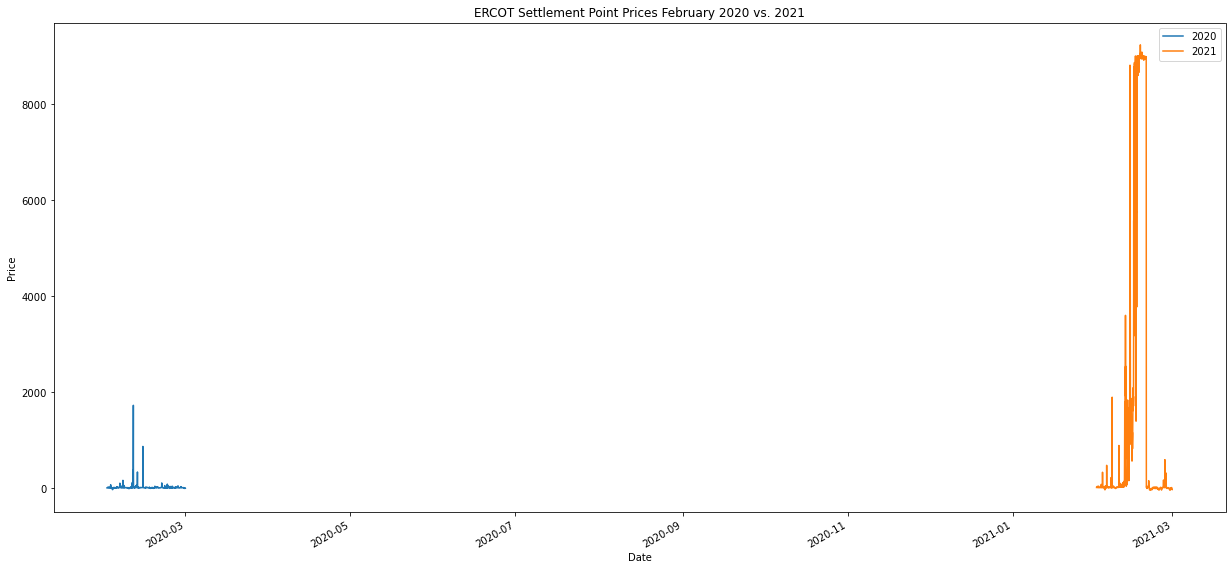

In [19]:
ax = ercot_houston_2020.plot(
    legend=True,
    figsize=(21,10),
    title='ERCOT Settlement Point Prices February 2020 vs. 2021',
    xlabel='Date'
)
ercot_2021.plot(ax=ax)
ax.legend(['2020', '2021'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')

In [20]:
ercot_houston_2020['Year'] = 1900
ercot_houston_2020['Month'] = ercot_houston_2020.index.month
ercot_houston_2020['Day'] = ercot_houston_2020.index.day
ercot_houston_2020['Hour'] = ercot_houston_2020.index.hour
ercot_houston_2020['Minute'] = ercot_houston_2020.index.minute

ercot_houston_2020['Date'] = str(ercot_houston_2020.index.month) + '-' + str(ercot_houston_2020.index.day) + '-' + '1900'
# ercot_houston_2020['Date'] = dt.datetime(ercot_houston_2020['Year'], ercot_houston_2020['Month'], ercot_houston_2020['Day'], ercot_houston_2020['Hour'], ercot_houston_2020['Minute'])

print(ercot_houston_2020.head(20))
#ercot_houston_2020['Date'] = ercot_houston_2020['Date'].apply(lambda x: x.replace(year=1900))


                     Settlement Point Price  Year  Month  Day  Hour  Minute  \
Datetime                                                                      
2020-02-01 01:00:00                   11.66  1900      2    1     1       0   
2020-02-01 01:00:00                   11.66  1900      2    1     1       0   
2020-02-01 01:15:00                   11.85  1900      2    1     1      15   
2020-02-01 01:15:00                   11.85  1900      2    1     1      15   
2020-02-01 01:30:00                   11.78  1900      2    1     1      30   
2020-02-01 01:30:00                   11.78  1900      2    1     1      30   
2020-02-01 01:45:00                   11.59  1900      2    1     1      45   
2020-02-01 01:45:00                   11.59  1900      2    1     1      45   
2020-02-01 02:00:00                   11.42  1900      2    1     2       0   
2020-02-01 02:00:00                   11.42  1900      2    1     2       0   
2020-02-01 02:15:00                   11.09  1900   